In [37]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
movies = pd.read_csv('../cleaned_data/movies_with_years_genres.csv')
movies.head(3)

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1995


In [11]:
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
          'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 
          'Sci-Fi', 'Thriller', 'War', 'Western']

In [10]:
year_normalizer = MinMaxScaler()
year_normalizer.fit(movies[['year']])
normalized_movies = movies.copy()
normalized_movies['year'] = year_normalizer.transform(normalized_movies[['year']])

In [9]:
year_standardizer = StandardScaler()
year_standardizer.fit(movies[['year']])
standardized_movies = movies.copy()
standardized_movies['year'] = year_standardizer.transform(standardized_movies[['year']])

In [40]:
inertias = {}
for i in range(2, 100):
    kmeans_model = KMeans(n_clusters=i, random_state=0, n_init='auto')
    kmeans_model.fit(normalized_movies[genres + ['year']])
    inertias[i] = kmeans_model.inertia_

<AxesSubplot: >

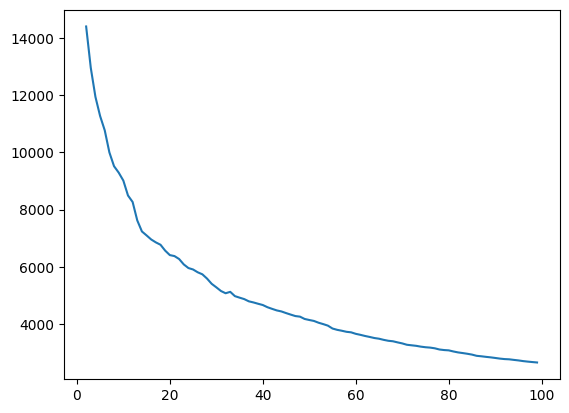

In [42]:
sns.lineplot(x=inertias.keys(), y=inertias.values())

In [17]:
normalized_movies['cluster'] = kmeans_model.predict(normalized_movies[genres + ['year']])
normalized_movies.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,cluster
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.801724,6
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.801724,6
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.801724,8
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.801724,8
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.801724,0
